<a href="https://colab.research.google.com/github/fatday/CME241_RLFinance/blob/main/A2/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stanford CME 241 (Winter 2025) - Assignment 2

**Due: Tuesday, February 4 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):*

https://github.com/my-username/my-repo/assignment-file-name.ipynb

*Group members (replace below names with people in your group):*
- Person 1 Justin Li
- Person 2 Ziang Song
- Person 3 Essie Cao

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1: Job-Hopping and Wages-Utility-Maximization (Led by Ziang Song)

You are a worker who starts every day either employed or unemployed. If you start your day employed, you work on your job for the day (one of $n$ jobs, as elaborated later) and you get to earn the wage of the job for the day. However, at the end of the day, you could lose your job with probability $\alpha \in [0,1]$, in which case you start the next day unemployed. If at the end of the day, you do not lose your job (with probability $1-\alpha$), then you will start the next day with the same job (and hence, the same daily wage).

On the other hand, if you start your day unemployed, then you will be randomly offered one of $n$ jobs with daily wages $w_1, w_2, \ldots w_n \in \mathbb{R}^+$ with respective job-offer probabilities $p_1, p_2, \ldots p_n \in [0,1]$ (with $\sum_{i=1}^n p_i = 1$). You can choose to either accept or decline the offered job. If you accept the job offer, your day progresses exactly like the **employed-day** described above (earning the day's job wage and possibly (with probability $\alpha$) losing the job at the end of the day). However, if you decline the job offer, you spend the day unemployed, receive the unemployment wage $w_0 \in \mathbb{R}^+$ for the day, and start the next day unemployed.

The problem is to identify the optimal choice of accepting or rejecting any of the job offers the worker receives, in a manner that maximizes the infinite-horizon **Expected Discounted-Sum of Wages Utility**. Assume the daily discount factor for wages (employed or unemployed) is $\gamma \in [0,1])$. Assume Wages Utility function to be $U(w) = \log(w)$ for any wage amount $w \in \mathbb{R}^+$. The goal is to maximize:

$$
\mathbb{E}\left[\sum_{u=t}^\infty \gamma^{u-t} \cdot \log(w_{i_u})\right]
$$

at the start of a given day $t$ ($w_{i_u}$ is the wage earned on day $u$, $0 \leq i_u \leq n$ for all $u \geq t$).

---

### Subquestions

#### Part (A): MDP Modeling

Express the job-hopping problem as an MDP using clear mathematical notation by defining the following components:

1. **State Space**: Define the possible states of the MDP.
2. **Action Space**: Specify the actions available to the worker at each state.
3. **Transition Function**: Describe the probabilities of transitioning between states for each action.
4. **Reward Function**: Specify the reward associated with the states and transitions.
5. **Bellman Optimality Equation**: Write the Bellman Optimality Equation customized for this MDP.

---

#### Part (B): Python Implementation

Write Python code that:

1. Solves the Bellman Optimality Equation (hence, solves for the **Optimal Value Function** and the **Optimal Policy**) with a numerical iterative algorithm.
2. Clearly define the inputs and outputs of your algorithm with their types (`int`, `float`, `List`, `Mapping`, etc.).

*Note*: For this problem, write the algorithm from scratch without using any prebuilt MDP/DP libraries or code.

---

#### Part (C): Visualization and Analysis

1. Plot the **Optimal Value Function** as a function of the state for a specific set of parameters ($n$, $w_1, \ldots, w_n$, $p_1, \ldots, p_n$, $\alpha$, $\gamma$, $w_0$).
2. Include these graphs in your submission.

---

#### Part (D): Observations

1. What patterns do you observe in the **Optimal Policy** as you vary the parameters $n$, $\alpha$, and $\gamma$?
2. Provide a brief discussion of your findings.

---

### Part (A) Answer
1. State Space: The state space is $\{o_1, o_2, \ldots, o_n, s_1, s_2, \ldots, s_n\}$, where $o_i$ represents the state of the worker being unemployed and get the $i$-th offer, $s_i$ represents the state of the worker being employed in the $i$-th job.

2. Action Space: at state $o_i, i > 0$, the action space is $\{A,D\}$, accept or decline. at $w_i, i > 0$, the action space is $\{W\}$ as the only option is to work.

3. Transition Function: transition function is defined as follows:
$$
P(s_i, W, o_j) = P(o_i, A, o_j) = p_j \cdot \alpha, \quad P(s_i, W, s_j) = P(o_i, A, s_j) = 1 - \alpha, \quad P(o_i, D, o_j) = p_j \ \ \ \forall i, j.
$$

4. Reward Function: reward function is defined as follows:
$$
r(s_i, W) = r(o_i, A) = w_i  \quad r(o_i, D)  = w_0 \forall i.
$$

5. Bellman Optimality Equation: the Bellman Optimality Equation is defined as follows:
\begin{align*}
V^*(s_i) &= \log(w_i) + \gamma \left( \sum_{j=1}^n p_j \cdot \alpha \cdot V^*(o_j) + (1 - \alpha) \cdot V^*(s_i) \right), \\
V^*(o_i) &= \max\left\{\log(w_i) + \gamma \left( \sum_{j=1}^n p_j \cdot \alpha \cdot V^*(o_j) + (1 - \alpha) \cdot V^*(s_i) \right), \log(w_0) + \gamma \left( \sum_{j=1}^n p_j \cdot V^*(o_j) \right)\right\}.
\end{align*}


### Part (B) Answer

In [ ]:
import numpy as np

def solve_job_search_mdp(n, wages, probs, alpha, gamma, w0, epsilon=1e-6, max_iter=1000):
    """
    Solves the job search MDP using value iteration.

    Args:
        n (int): Number of possible jobs
        wages (list): List of wages for each job
        probs (list): List of probabilities for each job offer
        alpha (float): Probability of losing job
        gamma (float): Discount factor
        w0 (float): Unemployment benefit
        epsilon (float): Convergence threshold
        max_iter (int): Maximum number of iterations

    Returns:
        tuple: (V, policy) where V is dict of optimal values and policy is dict of optimal actions
    """
    # Initialize value function
    V = {}
    for i in range(n):
        V[f's{i+1}'] = 0  # employed states
        V[f'o{i+1}'] = 0  # offer states

    # Initialize policy
    policy = {}

    # Value iteration
    for _ in range(max_iter):
        delta = 0
        V_old = V.copy()

        # Update employed states
        for i in range(n):
            employed_value = np.log(wages[i]) + gamma * (
                sum(probs[j] * alpha * V_old[f'o{j+1}'] for j in range(n)) +
                (1 - alpha) * V_old[f's{i+1}']
            )
            V[f's{i+1}'] = employed_value
            policy[f's{i+1}'] = 'W'  # only action is work

        # Update offer states
        for i in range(n):
            # Value of accepting
            accept_value = np.log(wages[i]) + gamma * (
                sum(probs[j] * alpha * V_old[f'o{j+1}'] for j in range(n)) +
                (1 - alpha) * V_old[f's{i+1}']
            )

            # Value of declining
            decline_value = np.log(w0) + gamma * sum(
                probs[j] * V_old[f'o{j+1}'] for j in range(n)
            )

            # Take max and update policy
            if accept_value > decline_value:
                V[f'o{i+1}'] = accept_value
                policy[f'o{i+1}'] = 'A'
            else:
                V[f'o{i+1}'] = decline_value
                policy[f'o{i+1}'] = 'D'

            delta = max(delta, abs(V[f'o{i+1}'] - V_old[f'o{i+1}']))

        if delta < epsilon:
            break

    return V, policy

### Part (C) Answer

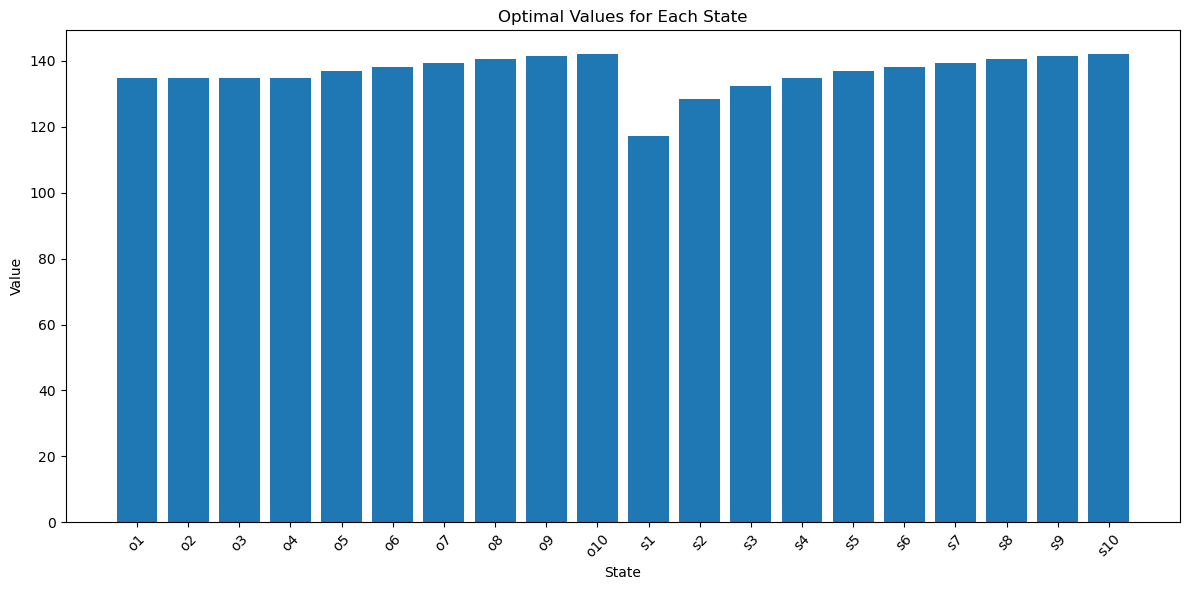

In [ ]:
# Example usage:
n = 10  # number of possible jobs
wages = [50 + i*200 for i in range(n)]  # wages from 50 to 230 in steps of 20
probs = [1/n] * n  # equal probability for each job offer
alpha = 0.1  # probability of losing job
gamma = 0.95  # discount factor
w0 = 50  # unemployment benefit

V, policy = solve_job_search_mdp(n, wages, probs, alpha, gamma, w0)

# Visualize the optimal value function
import matplotlib.pyplot as plt

# Create lists of state names and corresponding values, ordered o1-o10 then s1-s10
states = [f'o{i+1}' for i in range(n)] + [f's{i+1}' for i in range(n)]
values = [V[state] for state in states]

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(states, values)
plt.title('Optimal Values for Each State')
plt.xlabel('State')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Part (D) Answer

Based on the optimal value function and policy plots, we can make several observations:

1. Wage Structure and Threshold Policy:
    - We let wages w_i increase linearly with i ($w_i = 50 + 200i$)
    - The optimal policy follows a threshold rule: accept offers above a certain wage level
    - This creates a clear decision boundary in the policy between 'Reject' and 'Accept' regions

2. Impact of Job Loss Probability (α):
    - When we fix n and γ, increasing α (probability of job loss) lowers the acceptance threshold
    - This makes intuitive sense: with higher job instability, workers become less selective
    - We can see this in the policy table where rows with higher α show more 'Accept' decisions

3. Impact of Discount Factor (γ):
    - When we fix n and α, increasing γ raises the acceptance threshold
    - A higher γ means workers value future rewards more heavily
    - This leads to more selective behavior as shown in the policy table's bottom rows
    - Workers with high γ are willing to wait longer for better opportunities

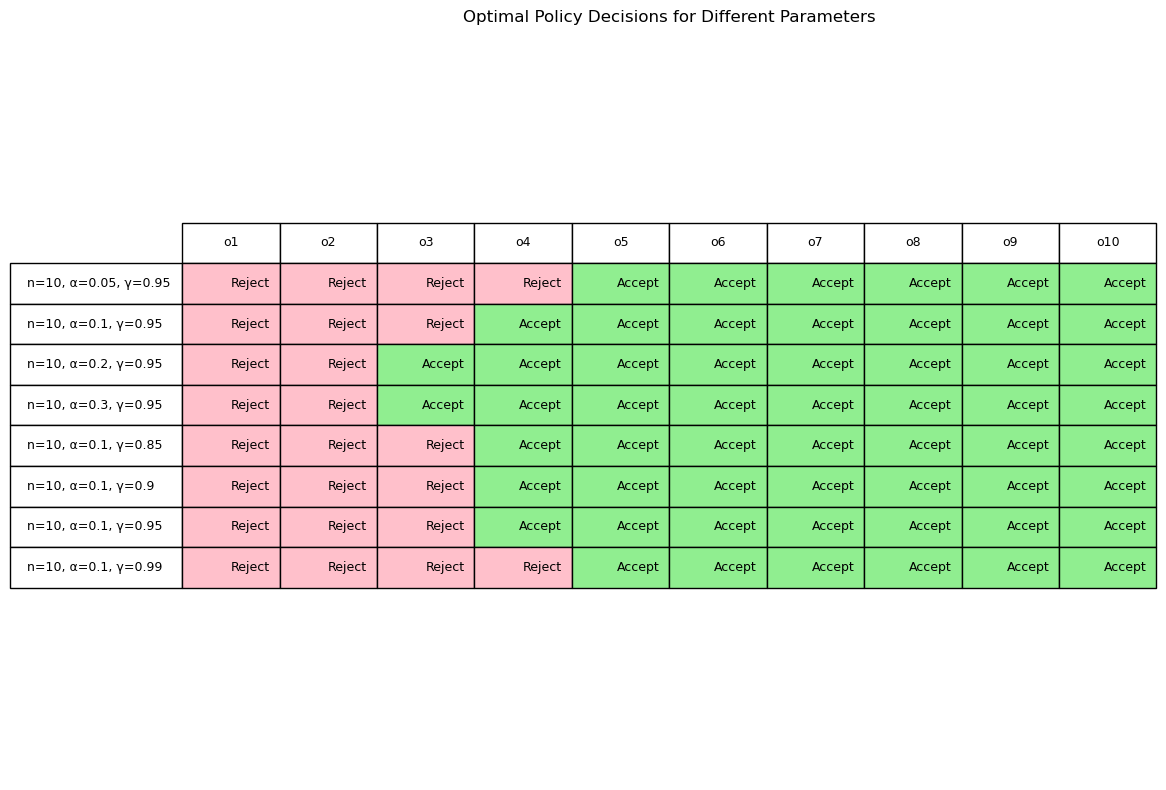

In [ ]:
# Visualize the optimal policy for different parameters
parameter_sets = [
    (10, 0.05, 0.95),
    (10, 0.1, 0.95),
    (10, 0.2, 0.95),
    (10, 0.3, 0.95),
    (10, 0.1, 0.85),
    (10, 0.1, 0.9),
    (10, 0.1, 0.95),
    (10, 0.1, 0.99)
]

# Create a table visualization
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Optimal Policy Decisions for Different Parameters')

# Get decisions for each parameter set
all_decisions = []
param_labels = []
for n, alpha, gamma in parameter_sets:
    V, policy = solve_job_search_mdp(n, wages, probs, alpha, gamma, w0)
    decisions = ['Accept' if policy[f'o{i+1}'] == 'A' else 'Reject' for i in range(n)]
    all_decisions.append(decisions)
    param_labels.append(f'n={n}, α={alpha}, γ={gamma}')

# Create table
table = ax.table(cellText=all_decisions,
                rowLabels=param_labels,
                colLabels=[f'o{i+1}' for i in range(10)],
                loc='center',
                cellColours=[['pink' if d == 'Reject' else 'lightgreen' for d in row] for row in all_decisions])

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 2)

# Hide axes
ax.axis('off')

plt.tight_layout()
plt.show()


## Question 2: Two-Stores Inventory Control (Led by ______)

We extend the capacity-constrained inventory example implemented in [rl/chapter3/simple_inventory_mdp_cap.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter3/simple_inventory_mdp_cap.py) as a `FiniteMarkovDecisionProcess` (the Finite MDP model for the capacity-constrained inventory example is described in detail in Chapters 1 and 2 of the RLForFinanceBook). Here we assume that we have two different stores, each with their own separate capacities $C_1$ and $C_2$, their own separate Poisson probability distributions of demand (with means $\lambda_1$ and $\lambda_2$), their own separate holding costs $h_1$ and $h_2$, and their own separate stockout costs $p_1$ and $p_2$. At 6pm upon stores closing each evening, each store can choose to order inventory from a common supplier (as usual, ordered inventory will arrive at the store 36 hours later). We are also allowed to transfer inventory from one store to another, and any such transfer happens overnight, i.e., will arrive by 6am next morning (since the stores are fairly close to each other). Note that the orders are constrained such that following the orders on each evening, each store's inventory position (sum of on-hand inventory and on-order inventory) cannot exceed the store's capacity (this means the action space is constrained to be finite). Each order made to the supplier incurs a fixed transportation cost of $K_1$ (fixed-cost means the cost is the same no matter how many units of non-zero inventory a particular store orders). Moving any non-zero inventory between the two stores incurs a fixed transportation cost of $K_2$.

Model this as a derived class of `FiniteMarkovDecisionProcess` much like we did for `SimpleInventoryMDPCap` in the code repo. Set up instances of this derived class for different choices of the problem parameters (capacities, costs etc.), and determine the Optimal Value Function and Optimal Policy by invoking the function `value_iteration` (or `policy_iteration`) from file [rl/dynamic_programming.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/dynamic_programming.py).

Analyze the obtained Optimal Policy and verify that it makes intuitive sense as a function of the problem parameters.

In [ ]:
# fill in with Python code

## Question 3: Dynamic Price Optimization (Led by Justin Li)

You own a supermarket, and you are $T$ days away from Halloween 🎃. You have just received $M$ Halloween masks from your supplier. You want to dynamically set the selling price of the Halloween masks at the start of each day in a manner that maximizes your **Expected Total Sales Revenue** for Halloween masks this season (assume no one will buy Halloween masks after Halloween).

Assume that for each of the $T$ days, you are required to select a price for that day from one of $N$ prices $p_1, p_2, \dots, p_N \in \mathbb{R}$, and that price is the selling price for all masks on that day. Assume that the customer demand for the number of Halloween masks on any day is governed by a Poisson probability distribution with mean $\lambda_i \in \mathbb{R}$ if you select that day’s price to be $p_i$ (where $i$ is a choice among $1, 2, \dots, N$).

Note that on any given day, the demand could exceed the number of Halloween masks you have in the store, in which case the number of masks sold on that day will be equal to the number of Halloween masks you had at the start of that day.

We spoke about this example in class - referencing the slides here (if needed) could be helpful!

---

### Subquestions

#### Part (A): Bellman Optimality Equation

Write the **Bellman Optimality Equation** customized to this Markov Decision Process (MDP). Essentially, you need to express the **Optimal Value Function** $v_*$ recursively based on taking the best action in the current state and based on the subsequent random customer demand that would produce the appropriate reward and take you to the next state.

**Note**: The probability mass function of a Poisson distribution with mean $\lambda \in \mathbb{R}$ is given by:

$$
f(k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0, 1, 2, \dots
$$

---

#### Part (B): Boundary Conditions

To be able to solve the $v_*$ recursion, you need to know the values of $v_*$ for the boundary case (boundary states). Write down the boundary case(s) for the $v_*$ recursion.

---

#### Part (C): Numerical Solution

You can solve this $v_*$ recursion (hence, solve for the **Optimal Policy** $\pi_*$) with a numerical recursive algorithm (essentially a special form of Dynamic Programming algorithm customized to this problem).

Write Python code for this algorithm that would enable you to dynamically set the selling price at the start of each day. Clearly define the inputs and outputs of your algorithm with their types (`int`, `float`, `List`, `Mapping`, etc.).

---


### Part (A) Answer

Let the pdf of $Poi(λ_i)$ be $f(k,\lambda_i)=\frac{e^{-\lambda_i}\lambda_i^k}{k!}$ for $k=0,1,2,...$, based on the lecture slides we have

\begin{align*}
&\mathcal{S}_t=\{(t, I_t)\mid I_t\in \mathbb{Z},\ 0\leq I_t\leq M\} \ \ \ \ \text{for all $0\leq t\leq T$}\\
&\mathcal{N}_t=\mathcal{S}_t \ \ \ \ \mathcal{A}_t=\{1,2,..,N\} \ \ \text{for all $0\leq t<T$} \ \ \ \ \text{and $\mathcal{N}_T=∅$}\\
&I_0=M \ \ \ I_{t+1}=\max(0, I_t-d_t) \ \ \ \ d_t\mid a_t=i \ \sim Poi(\lambda_i)\\
&\text{Sales Revenue on day $t$ is $\min(I_t,d_t)\cdot p_i$}\\
&\\
&(\mathcal{P}_R)_t(I_t, a_t, r_{t+1},I_{t+1})=
\begin{cases}
f(I_t-I_{t+1},\lambda_i)&\text{if $a_t=i$,  $0<I_{t+1}\leq I_t$ and $r_{t+1}=(I_t-I_{t+1})\cdot p_i$}\\
\sum_{j=I_t}^\infty f(j, \lambda_i)&\text{if $a_t=i$, $I_{t+1}=0$ and and $r_{t+1}=(I_t-I_{t+1})\cdot p_i$}\\
0&\text{other wise}
\end{cases}
\end{align*}

Now the MPD Bellman Optimality Equation will be
\begin{align*}
V^*_t(I_t)&=\max_{a_t\in \mathcal{A_t}}\left(\sum_{I_{t+1}}\sum_{r_{t+1}} (\mathcal{P}_R)_t(I_t, a_t, r_{t+1}, I_{t+1})\cdot (r_{t+1}+\gamma\cdot V_{t+1}^*(I_{t+1})) \right)\\
&=\max_{i\in \{1,2,...,N\}}\left(\sum_{I_{t+1}} (\mathcal{P}_R)_t(I_t, a_t, r_{t+1}, I_{t+1})\cdot ((I_t-I_{t+1})\cdot p_i+\gamma\cdot V_{t+1}^*(I_{t+1}))\right)\\
&=\max_{i\in \{1,2,...,N\}}\left(\sum_{k=0}^{I_t-1} f(k,\lambda_i)\cdot [k\cdot p_i+\gamma\cdot V_{t+1}^*(I_{t}-k)] + [I_t\cdot p_i + \gamma \cdot V^*_{t+1}(0)]\cdot \sum_{j=I_t}^\infty f(j, \lambda_i) \right)
\end{align*}

### Part (B) Answer

Note that when pass the Halloween, no one will buy masks, so as $t=T+1$:

$$
V_t^*(x)=0 \ \ \ \ \text{for all $x$}
$$

Moreover, when the masks sold out before Halloween, there is no mask to sell, so no revenue, so as $t\leq T$:

$$
V^*_t(0)=0
$$

Combining the result we get the boundaries cases:
$$
V^*_t(x)=0 \ \ \ \ \ \text{for $(t,x)$ with $t=T+1$ or $x=0$}
$$

### Part (C) Answer

In [9]:
from typing import List # Import the List type hint
import numpy as np
from scipy.stats import poisson


def solve_price_optimization(M: int, T: int, prices: List[float], lambdas: List[float], gamma: float = 1) -> List[float]:
    v_star_dp = [[0] * (M + 1) for _ in range(T + 2)]
    policy = [[0] * (M + 1) for _ in range(T + 1)]

    # a function that find the best action values and action at time T given inventory I
    def action_value_at_T(I: int, v_star_tplus1: List[float], gamma: float = 1) -> float:
        action_values = [0] * len(prices)
        # find v given price_i
        for i, price in enumerate(prices):
            demand_probs = poisson.pmf(np.arange(0, I), lambdas[i])
            sell_out_prob = 1 - sum(demand_probs)
            v_action_i = (I * price + gamma * v_star_tplus1[0]) * sell_out_prob
            for j, demand_prob in enumerate(demand_probs):
                v_action_i += (j * price + gamma * v_star_tplus1[I - j]) * demand_prob
            action_values[i] = v_action_i

        # return v_star and policy
        return max(action_values), prices[np.argmax(action_values)]

    # DP Table to find best policy (best price to set) and value function value
    for t in range(T, -1, -1):
        for i in range(1, M + 1):
          if t == T and i < M:
            break
          v_star_t, policy_t = action_value_at_T(i, v_star_dp[t+1])
          v_star_dp[t][i] = v_star_t
          policy[t][i] = policy_t

    return v_star_dp, policy

## Question 4: Risk-Aversion and Utility Optimization under CARA Utility (Led by Justin Li)

You are tasked with analyzing the behavior of an investor who seeks to maximize their utility under **CARA Utility**. The investor has wealth $W$ and the CARA utility function:

$$
U(W) = \frac{1 - e^{-aW}}{a}, \quad a > 0,
$$

where $a$ represents the investor's **risk aversion**.

The investor allocates their wealth between:
1. A **riskless asset** with a fixed return $r$, and
2. A **risky asset** with return $R \sim \mathcal{N}(\mu, \sigma^2)$

The investor allocates a fraction $\pi$ of their wealth to the risky asset and $(1 - \pi)$ to the riskless asset. The wealth $W$ after one year is given by:

$$
W = (1 + r)(1 - \pi) + (1 + R)\pi.
$$

The goal is to analyze the investor’s optimal allocation $\pi$ to the risky asset and compute key risk-related quantities.

---

### Subquestions

#### Part (A): Expected Utility and Certainty-Equivalent Wealth

1. Derive the expression for the **expected utility** $\mathbb{E}[U(W)]$, using the given CARA utility function and assuming $R \sim \mathcal{N}(\mu, \sigma^2)$.
2. Using a Taylor expansion, approximate the **certainty-equivalent wealth** $W_{CE}$ up to second-order terms.

---

#### Part (B): Optimal Portfolio Allocation

Derive the optimal fraction $\pi^*$ of wealth to be allocated to the risky asset such that the **expected utility** $\mathbb{E}[U(W)]$ is maximized. Express $\pi^*$ in terms of $a$, $\mu$, $r$, and $\sigma^2$.

---

#### Part (C): Risk Premium

1. Using the results from Part (A), calculate the **absolute risk premium** $\pi_A = \mathbb{E}[W] - W_{CE}$.
2. Verify that $\pi_A \approx \frac{a \pi^2 \sigma^2}{2}$ for small $\sigma^2$.

---

#### Part (D): Numerical Calculations and Interpretation

Given the parameters $r = 0.02$, $\mu = 0.08$, $\sigma^2 = 0.04$, and $a = 3$:
1. Compute the optimal allocation $\pi^*$.
2. Calculate the certainty-equivalent wealth $W_{CE}$.
3. Compute the absolute risk premium $\pi_A$.
4. Interpret the results and discuss how changes in $a$ and $\sigma^2$ affect the risk premium and portfolio allocation.

---

#### Part (E): Expected Utility under Uniform Distribution

Now assume that the return of the risky asset, $R$, is no longer normally distributed. Instead, $R \sim \text{Uniform}[\alpha, \beta]$, where $\alpha$ and $\beta$ are the lower and upper bounds of the distribution, respectively.

1. Derive the new expression for the **expected utility** $\mathbb{E}[U(W)]$. Make sure to simplify your result as much as possible, and ensure that it explicitly depends on $a$, $\pi$, $\alpha$, $\beta$, and $r$.

**Hint**: Use the fact that if $W \sim \text{Uniform}[w_{\text{min}}, w_{\text{max}}]$, then:

$$
\mathbb{E}[g(W)] = \frac{1}{w_{\text{max}} - w_{\text{min}}} \int_{w_{\text{min}}}^{w_{\text{max}}} g(W) \, dW.
$$

---

### Part (A) Answer

**(A)-(1)**

Let $f(R)$ be the pdf of $R$, then with $W=(1+r)(1-\pi)+(1+R)\pi$ we have for $a\neq 0$:

\begin{align*}
E[U(W)]&=\int_{\mathbb{R}}\frac{1-e^{-a[(1+r)(1-\pi)+(1+R)\pi]}}{a}f(R)dR\\
&=\frac{1}{a}\int_{\mathbb{R}} f(R)dR - \frac{e^{-a[(1+r)(1-\pi)+\pi]}}{a}\int_{\mathbb{R}}e^{-aR\pi}f(R)dR\\
&=\frac{1}{a}\cdot 1- \frac{e^{-a[(1+r)(1-\pi)+\pi]}}{a}\cdot e^{-\mu a\pi +\frac{\sigma^2a^2\pi^2}{2}}\\
&=\frac{1-e^{-a(1+r)+a\pi(r-\mu)+\frac{\sigma^2a^2\pi^2}{2}}}{a}
\end{align*}

When $a=0$, by L'Hospital we have $U(W)=W= (1+r)(1-\pi)+(1+R)\pi$, so that $E[U(W)]=E[W]=(1+r)(1-\pi)+(1+\mu)\pi=1+r+\pi(\mu-r)$, then combining two cases we have
$$
E[U(W)]=
\begin{cases}
\displaystyle
\frac{1-e^{-a(1+r)+a\pi(r-\mu)+\frac{\sigma^2a^2\pi^2}{2}}}{a}&\text{ for $a\neq 0$}\\
1+r+\pi(\mu-r)&\text{ for $a=0$}
\end{cases}
$$

**(A)-(2)**

We expand $U(W_{CE})$ around $E[U(W)]$ and $U(W)$ around $E[U(W)]$, let's denote $\overline{W}=E[W]$, then

\begin{align*}
&U(W_{CE})\approx U(\overline{W})+U'(\overline{W})(W_{CE}-\overline{W})+\frac{1}{2}U''(\overline{W})(W_{CE}-\overline{W})^2\\
&U(W)\approx U(\overline{W})+U'(\overline{W})(W-\overline{W})+\frac{1}{2}U''(\overline{W})(W-\overline{W})^2
\end{align*}
Take the expectation of the second equation, since $E[U(W)]=U(W_{CE})$, then
$$
U(W_{CE})\approx U(\overline{W})+\frac{1}{2}U''(\overline{W})\cdot \sigma^2_W
$$
Plug in the first equation, then we get
$$
U(\overline{W})+U'(\overline{W})(W_{CE}-\overline{W})+\frac{1}{2}U''(\overline{W})(W_{CE}-\overline{W})^2\approx U(\overline{W})+\frac{1}{2}U''(\overline{W})\cdot \sigma^2_W
$$

For all $W$ we have
$$
U'(W)=e^{-aW} \ \ \ \ \ \ U''(W)=-ae^{-aW} \ \ \ \ \ \ \ \implies \ \ \ \ \ \ \
\frac{U''(W)}{U'(W)}=-a
$$

so we devide both side by $U'(\overline{W})$ and solving the quadratic equation for $W_{CE}-\overline{W}$, we get

$$
W_{CE}-\overline{W}=\frac{1\pm \sqrt{1+a^2\sigma_W^2} }{a}
$$

Note that in Risk Aversion, we have $W_{CE}-\overline{W}<0$, so we take
$$
W_{CE}-\overline{W}=\frac{1- \sqrt{1+a^2\sigma_W^2} }{a}
$$

Note that $W=(1+r)(1-\pi)+(1+R)\pi$, so $Var[W]=\sigma_W^2=\pi^2\sigma^2$. Now we combine the result to get
$$
W_{CE}=(1+r)+\pi(\mu-r)+\frac{1- \sqrt{1+a^2\pi^2\sigma^2} }{a}
$$
as desired.

### Part (B) Answer

As $a=0$, $E[U(W)]=1+r+\pi(\mu-r)$, so we can just take $\pi^*=1$ to maximize $E[U(W)]$. When $a\neq 0$, we can maximize $E[U(W)]$ by minimizing the exponent that contain $\pi$:

$$
\pi^*= \textbf{arg}\max_{\pi\in [0,1]} \left ( a\pi(r-\mu)+\frac{\sigma^2a^2\pi^2}{2} \right)
$$

Since this is a quadraic function, so

$$
\pi^*=\frac{\mu-r}{a\sigma^2}
$$

Combining the result to get

$$
\pi^*=\begin{cases}
\frac{\mu-r}{a\sigma^2}&\text{ for $a\neq 0$}\\
1&\text{ for $a=0$}
\end{cases}
$$

### Part (C) Answer

By $\textbf{(A)}$, we have
$$
\pi_A=E[W]-W_{CE}=\overline{W}-W_{CE}=-\frac{1- \sqrt{1+a^2\pi^2\sigma^2} }{a}
$$

As $\sigma^2$ is small, we can expand $\sqrt{1+a^2\pi^2\sigma^2}$ around $0$:

$$
\sqrt{1+a^2\pi^2\sigma^2} \approx 1+\frac{a^2\pi^2\sigma^2}{2} \ \ \ \ \ \ \implies \ \ \ \ \ \ -\frac{1- \sqrt{1+a^2\pi^2\sigma^2} }{a} \approx -\frac{1- \left( 1+\frac{a^2\pi^2\sigma^2}{2}\right) }{a}=\frac{a\pi^2\sigma^2}{2}
$$

this gives us that

$$
\pi_A\approx \frac{a\pi^2\sigma^2}{2}
$$

### Part (D) Answer



In [ ]:
import numpy as np
r, mu, sigma_square, a = 0.02, 0.08, 0.04, 3

def pi_star_fun(mu, r, sigma_square, a):
    return (mu - r)/ (a * sigma_square) if a != 0 else 1

def W_CE_fun(mu, r, sigma_square, a):
  pi = pi_star_fun(mu, r, sigma_square, a)
  return (1 + r) + pi * (mu - r) + (1 - np.sqrt(1+a**2 * pi ** 2 * sigma_square)) / a

def pi_A_fun(mu, r, sigma_square, a):
  pi = pi_star_fun(mu, r, sigma_square, a)
  return - (1 - np.sqrt(1+a**2 * pi ** 2 * sigma_square)) / a

In [ ]:
pi_star = pi_star_fun(mu, r, sigma_square, a)
W_CE = W_CE_fun(mu, r, sigma_square, a)
pi_A = pi_A_fun(mu, r, sigma_square, a)
print(f"pi_star = {pi_star}")
print(f"W_CE = {round(W_CE,4)}")
print(f"pi_A = {round(pi_A,4)}")

pi_star = 0.375
W_CE = 1.0315
pi_A = 0.011


## The following are the numerical result:

\begin{array}{|c|c|c|}
\hline
\text{Target}&\text{Numerical Result} &\text{iInterpretation}\\ \hline
\pi^*&0.5&\text{The optimal allocation is to allocate half wealth in riskless asset and anther half in risky asset}\\ \hline
W_{CE}&1.0353& \text{Under optimal allocation, it guaranteed the wealth after one year will be 1.0353} \\ \hline
\pi_A&0.0147& \text{Under optimal allocation, the guaranteed the wealth after 1 year is 0.0147 below the expected wealth} \\ \hline
\end{array}

## The affect of $a$ and $\sigma^2$ to $\pi^*$ and $\pi_A$:

$\displaystyle\pi^*=\frac{u-r}{a\sigma^2}$: As $a$ (risk aversion) or $\sigma^2$ (variance of risky asset return) increases, the allocation on risky asset will decrease. Because we want to maximize the $W_{EC}$ (**Certainty-Equivalent Value**), when $a$ and $\sigma^2$ gets large, we will prefer to invest more in riskless asset and invest less in risky asset.


$\pi_A$: Under optimal allocation, by $\textbf{(C)}$ we have
$$
\pi_A= \frac{a\sigma^2(\pi^*)^2}{2}=\frac{a\sigma^2}{2}\left(\frac{u-r}{a\sigma^2}\right)^2=\frac{(u-r)^2}{2a\sigma^2}
$$
so as $a$ or $\sigma^2$ increase, the risk premium $\pi_A$ will be smaller as we allocate more in riskless asset in our case, will push up the $W_{CE}$ which will make it closer to $E[W]$, so the risk premium decrease.

### Part (E) Answer

Let $f(R)$ be the pdf of $R$, so $f(R)=\frac{1}{\beta - \alpha}$. As $a\neq 0$:
\begin{align*}
E[U(W)]&=\int_\alpha^\beta \frac{1-e^{-a[(1+r)(1-\pi)+(1+R)\pi]}}{a}f(R)dR\\
&=\frac{1}{a}\int_\alpha^\beta f(R)dR - \frac{e^{-a[(1+r)(1-\pi)+\pi]}}{a}\int_\alpha^\beta e^{-aR\pi}f(R)dR\\
&=\frac{1}{a}\cdot 1-\frac{e^{-a[(1+r)(1-\pi)+\pi]}}{a(\beta-\alpha)}\int_\alpha^\beta e^{-aR\pi}dR\\
&=\frac{1}{a}+\frac{e^{-a[(1+r)(1-\pi)+\pi]}}{a(\beta-\alpha)}\cdot \frac{1}{a\pi}\left[e^{-a\pi \beta} - e^{-a\pi \alpha}\right]\\
&=\frac{1}{a^2\pi(\beta-\alpha)}\cdot \left(e^{-a[(1+r)+\pi(\beta-r)]} - e^{-a[(1+r)+\pi(\alpha-r)]}+a\pi(\beta-\alpha)\right)
\end{align*}

For $a=0$, we can just reuse the result from $\textbf{(A)}$, then we have

$$
E[U(W)]=
\begin{cases}
\displaystyle
\frac{1}{a^2\pi(\beta-\alpha)}\cdot \left(e^{-a[(1+r)+\pi(\beta-r)]} - e^{-a[(1+r)+\pi(\alpha-r)]}+a\pi(\beta-\alpha)\right)&\text{ for $a\neq 0$}\\
1+r+\pi(\mu-r)&\text{ for $a=0$}
\end{cases}
$$


## Question 5: Feeding Animals in a Zoo using Approximate Dynamic Programming (Led by ______)

You are tasked with developing a feeding strategy for a zoo using **Approximate Dynamic Programming (ADP)**. The zoo has a finite amount of food available each day, and you must distribute this food among a group of animals to maximize their overall satisfaction over a fixed time horizon $T$.

Each animal has:
1. A **hunger level** $h_i(t) \in \mathbb{R}$ at time $t$, which increases as time passes without food and decreases when food is provided.
2. A **satisfaction function** $u_i(f) = \log(1 + f)$, where $f$ is the amount of food given to the animal. Satisfaction increases logarithmically with food.

You start each day with a total amount of food $F$ that you can distribute to the animals. The objective is to maximize the **cumulative satisfaction** of all animals over $T$ days while considering that food is finite and hunger levels evolve dynamically.

---

### Problem Dynamics:
1. **State**:
   - The state at time $t$ is the vector of hunger levels of all animals: $\mathbf{h}(t) = [h_1(t), h_2(t), \dots, h_N(t)]$, where $N$ is the number of animals.

2. **Action**:
   - The action $\mathbf{f}(t) = [f_1(t), f_2(t), \dots, f_N(t)]$ represents the food allocated to each animal, subject to the constraint:
     $$
     \sum_{i=1}^N f_i(t) \leq F.
     $$

3. **State Transition**:
   - Hunger levels evolve according to the dynamics:
     $$
     h_i(t+1) = \max(0, h_i(t) + \gamma - \delta f_i(t)),
     $$
     where $\gamma$ is the natural rate at which an animal's hunger increases, and $\delta$ is the rate at which feeding reduces hunger.

4. **Reward**:
   - The reward at each time step is the total satisfaction of all animals:
     $$
     r(\mathbf{h}(t), \mathbf{f}(t)) = \sum_{i=1}^N \log(1 + f_i(t)).
     $$

5. **Value Function Approximation**:
   - Use a **linear function approximation** for the value function:
     $$
     V(\mathbf{h}(t); \mathbf{w}) = \mathbf{w}^\top \phi(\mathbf{h}(t)),
     $$
     where $\phi(\mathbf{h}(t))$ is a feature vector derived from the state, and $\mathbf{w}$ is a weight vector learned during training.

6. **Objective**:
   - Use **Approximate Dynamic Programming (ADP)** to iteratively update the weights $\mathbf{w}$ and maximize the total cumulative reward:
     $$
     \max \ \mathbb{E} \left[\sum_{t=0}^{T-1} r(\mathbf{h}(t), \mathbf{f}(t)) \right].
     $$

---

### Subquestions

#### Part (A): State Representation
Write down the state vector $\mathbf{h}(t)$ and describe how it evolves over time based on the dynamics provided above.

---

#### Part (B): Reward Function
Derive the formula for the reward function $r(\mathbf{h}(t), \mathbf{f}(t))$ explicitly for $N=3$ animals. Assume specific food allocations $\mathbf{f}(t) = [f_1, f_2, f_3]$.

---

#### Part (C): Linear Function Approximation
Explain how the value function $V(\mathbf{h}(t))$ is approximated using the feature vector $\phi(\mathbf{h}(t))$ and the weight vector $\mathbf{w}$. Discuss why feature normalization is essential in this problem. What would happen if we didn't normalize the features?

---

#### Part (D): Numerical Simulation
Using the provided starter code, fill in all `TODO` areas. This will allow you to train the ADP model and compute the following:
1. The convergence of weights $\mathbf{w}$ over episodes.
2. The hunger levels of each animal over the time horizon $T$.
3. The total utility (cumulative reward) achieved over time for all animals.

**Hint**: What does the weight update formula from the slides tell you? We know that $\mathbf{w}_{t+1}=\mathbf{w}_t-\alpha_t\cdot\nabla_w\mathit{L}\left(\mathbf{w}_t\right)$. How can we use this?

**Hint**: You should only need to fill in $3$ lines for the code below; the idea here is to conceptually understand approximate dynamic programming, so if you're coding a lot, you might be overcomplicating things!

---

#### Part (E): Visualization
Visualization code is provided to generate the following $3$ graphs:
1. **Convergence of Weights**: The values of the weights $\mathbf{w}$ over training episodes.
2. **Hunger Levels Over Time**: The hunger levels of each animal over the time horizon $T$.
3. **Total Utility Over Time**: The cumulative utility (reward) achieved for all animals over the time horizon.

Comment briefly on each of these graphs, and for the weights graph, discuss why the weights[0] line looks different from the rest (if weights[0] doesn't look different, you might have done something wrong!).

---

### Part (A) Answer

<span style="color:red">*fill in*</span>

### Part (B) Answer

<span style="color:red">*fill in*</span>

### Part (C) Answer

<span style="color:red">*fill in*</span>

### Part (D) Answer

In [ ]:
N = 3  # Number of animals
T = 10  # Time horizon
F = 10  # Total food available per time step
gamma = 1  # Hunger growth rate
delta = 0.5  # Feeding efficiency
alpha = 0.01  # Learning rate
regLambda = 0.01  # Regularization coefficient

# Feature function: Normalize hunger levels
def features(hunger_levels):
    norm_hunger = hunger_levels / (np.max(hunger_levels) + 1e-5)  # Normalize hunger levels
    return np.array([1] + list(norm_hunger))  # Add bias term

# Reward function
def reward(food_allocation):
    """Compute reward as the sum of logarithmic satisfaction."""
    TODO
    return _

# State transition function
def next_hunger(hunger_levels, food_allocation):
    """Compute next hunger levels based on current state and action."""
    TODO
    return _

# Bellman update with regularization
def bellman_update(states, actions, next_states, rewards, weights):
    """Perform one step of Bellman update for function approximation."""
    for s, a, ns, r in zip(states, actions, next_states, rewards):
        phi_s = features(s)
        phi_ns = features(ns)
        td_error = r + np.dot(weights, phi_ns) - np.dot(weights, phi_s)
        # use the update rule from the slides (regularized update)
        # will follow this form: weights += _ * _ * _ - regLambda * weights
        TODO
        weights += _
    return weights

# ADP Training
def approximate_dynamic_programming(num_episodes=100):
    global weights
    weights = np.zeros(len(features(np.zeros(N))))  # Initialize weights
    episode_rewards = []  # Track cumulative rewards per episode
    weights_history = []  # Track weights over episodes

    for episode in range(num_episodes):
        hunger_levels = np.zeros(N)  # Initial state
        total_reward = 0

        for t in range(T):
            # Sample a random action: Food allocation
            food_allocation = np.random.uniform(0, F, size=N)
            food_allocation = food_allocation / np.sum(food_allocation) * F

            # Calculate reward and next state
            r = reward(food_allocation)
            next_hunger_levels = next_hunger(hunger_levels, food_allocation)

            # Bellman update
            weights = bellman_update(
                [hunger_levels],
                [food_allocation],
                [next_hunger_levels],
                [r],
                weights,
            )

            # Update current state and accumulate reward
            hunger_levels = next_hunger_levels
            total_reward += r

        # Track metrics
        episode_rewards.append(total_reward)
        weights_history.append(weights.copy())
        print(f"Episode {episode + 1}: Total Reward = {total_reward:.2f}")

    return episode_rewards, weights_history

# Simulate a single episode and track hunger levels and total utility
def simulate_policy_and_utility(weights):
    hunger_levels = np.zeros(N)  # Initial hunger levels
    hunger_history = []  # Track hunger levels over time
    total_utility = []  # Track total utility (cumulative rewards) over time
    cumulative_utility = 0  # Initialize cumulative utility

    for t in range(T):
        # Compute action (food allocation)
        food_allocation = np.random.uniform(0, F, size=N)
        food_allocation = food_allocation / np.sum(food_allocation) * F

        # Record hunger levels
        hunger_history.append(hunger_levels.copy())

        # Calculate reward (utility) for this timestep
        r = reward(food_allocation)
        cumulative_utility += r  # Add to cumulative utility
        total_utility.append(cumulative_utility)

        # Update hunger levels
        hunger_levels = next_hunger(hunger_levels, food_allocation)

    return np.array(hunger_history), np.array(total_utility)

# Run the training process
episode_rewards, weights_history = approximate_dynamic_programming()

In [ ]:
# Plot cumulative reward over episodes
plt.figure(figsize=(8, 5))
plt.plot(episode_rewards, label="Cumulative Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Cumulative Reward over Episodes")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot weights convergence
weights_history = np.array(weights_history)
plt.figure(figsize=(8, 5))
for i in range(weights_history.shape[1]):
    plt.plot(weights_history[:, i], label=f"Weights[{i}]")
plt.xlabel("Episode")
plt.ylabel("Weight Value")
plt.title("Convergence of Weights in Linear Function Approximation")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Simulate policy and plot hunger levels and total utility over time
hunger_history, total_utility = simulate_policy_and_utility(weights)

# Plot hunger levels over time
plt.figure(figsize=(8, 5))
for i in range(hunger_history.shape[1]):
    plt.plot(hunger_history[:, i], label=f"Animal {i+1}")
plt.xlabel("Day")
plt.ylabel("Hunger Level")
plt.title("Hunger Levels over Time")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot total utility over time
plt.figure(figsize=(8, 5))
plt.plot(range(T), total_utility, label="Total Utility")
plt.xlabel("Day")
plt.ylabel("Cumulative Utility")
plt.title("Total Utility over Time for All Animals")
plt.legend()
plt.grid()
plt.show()

### Part (E) Answer

<span style="color:red">*fill in*</span>